In [96]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
import os
import glob
from scipy import misc
import pickle as pkl
import sys
import keras
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten, Reshape
from keras.models import Sequential
from keras.utils import np_utils
from glob import glob as glob


In [97]:
import glob
class VOC(object):
    
    def __init__(self,path):
        
        try:
            os.stat(path)
        except:
            print ('Path is invalid')
            return None
        
        self.path = os.path.join(os.path.join(path,'annotations'),'*')
        self.data = None
        self.labels = None
        self.names = []
        annotations = {}
        name = {}
        print ( 'Extracting annotations from',self.path)
        for file_name in glob(self.path):
            tree = ET.parse(file_name)
            root = tree.getroot()
            key = root.find('filename').text
            name[key] = root.find('object').find('name').text
            bndbox = []
            for child in root.find('object').find('bndbox'):
                bndbox.append(child.text)
            annotations[key] = bndbox
        
        self.path = os.path.join(os.path.join(path,'images'),'*')
        images = {}
        print ('Extracting images from',self.path)
        for file_name in glob(self.path):
            #print(file_name)
            key = file_name.split('/')[-1]
            img = misc.imread(file_name)
            img = misc.imresize(img,size=(200,200))
            images[key] = img
            
        print ('Constructing the Dataset')
        self.data = []
        self.labels = []
        for key in sorted(images.keys()):
            print (key)
            self.data.append(images[key])
            self.labels.append(annotations[key])
            self.names.append(name[key])
        self.data = np.asarray(self.data)
        print (self.data.shape)
        plt.imshow(self.data[0])
        
    def __str__(self):
        
        return str((self.data.shape,self.labels.shape))
    
    def save_to_disk(self,path):
        
        ## Pickeling the file and saving it to disk
        with open(os.path.join(path,'dataa.pkl'),'wb') as fp:
            pkl.dump(self.data,fp)
        


def _pp(l): # pretty printing 
    for i in l: print('{}: {}'.format(i,l[i]))

def pascal_voc_clean_xml(ANN, exclusive = False):
    #print('Parsing for {} {}'.format('exclusively' * int(exclusive)))

    dumps = list()
    cur_dir = os.getcwd()
    os.chdir(ANN)
    annotations = os.listdir('.')
    annotations = glob.glob(str(annotations)+'*.xml')
    size = len(annotations)

    for i, file in enumerate(annotations):
        # progress bar      
        sys.stdout.write('\r')
        percentage = 1. * (i+1) / size
        progress = int(percentage * 20)
        bar_arg = [progress*'=', ' '*(19-progress), percentage*100]
        bar_arg += [file]
        sys.stdout.write('[{}>{}]{:.0f}%  {}'.format(*bar_arg))
        sys.stdout.flush()
        
        # actual parsing 
        in_file = open(file)
        tree=ET.parse(in_file)
        root = tree.getroot()
        jpg = str(root.find('filename').text)
        imsize = root.find('size')
        w = int(imsize.find('width').text)
        h = int(imsize.find('height').text)
        all = list()

        for obj in root.iter('object'):
                current = list()
                name = obj.find('name').text
                
                        

                xmlbox = obj.find('bndbox')
                xn = int(float(xmlbox.find('xmin').text))
                xx = int(float(xmlbox.find('xmax').text))
                yn = int(float(xmlbox.find('ymin').text))
                yx = int(float(xmlbox.find('ymax').text))
                current = [name,xn,yn,xx,yx]
                all += [current]

        add = [[jpg, [w, h, all]]]
        dumps += add
        in_file.close()

    # gather all stats
    stat = dict()
    for dump in dumps:
        all = dump[1][2]
        for current in all:
                if current[0] in stat:
                    stat[current[0]]+=1
                else:
                    stat[current[0]] =1

    print('\nStatistics:')
    _pp(stat)
    print('Dataset size: {}'.format(len(dumps)))

    os.chdir(cur_dir)
    return dumps




In [98]:
a=pascal_voc_clean_xml('/Users/shivamchandhok/Desktop/VOC2007/annotations')

[====================>]100%  009961.xml
Statistics:
dog: 538
bottle: 634
train: 328
sofa: 425
car: 1644
chair: 1432
bicycle: 418
aeroplane: 331
motorbike: 390
cat: 389
cow: 356
boat: 398
tvmonitor: 367
horse: 406
person: 5447
diningtable: 310
bird: 599
sheep: 353
pottedplant: 625
bus: 272
Dataset size: 5011


In [99]:
name=[]
dimension=[]
item=[]
l=[]

In [100]:
for i,img in enumerate(a):
    name.append(img[0])
    dimension.append((img[1][0],img[1][1]))
    item.append(img[1][2][0])

In [101]:
for j,i in enumerate(item):
    print(i[1])
    print(dimension[j][0])
    l.append((i[1]*200/dimension[j][0],i[2]*200/dimension[j][1],i[3]*200/dimension[j][0],i[4]*200/dimension[j][1]))

263
500
141
500
69
500
156
500
92
334
185
480
231
500
33
375
1
336
9
334
196
500
90
500
36
500
104
500
9
500
116
360
1
500
27
332
156
500
363
500
263
500
1
500
211
332
15
500
58
375
405
500
352
500
414
500
1
500
274
500
123
500
1
496
2
500
209
500
40
333
121
375
240
500
15
500
235
500
109
500
20
500
125
500
175
500
20
500
4
500
185
500
416
500
403
500
471
500
17
500
79
500
70
333
277
500
1
500
164
500
66
500
251
500
36
475
1
500
425
500
70
334
4
500
1
500
43
500
73
447
1
500
6
500
107
500
25
500
26
500
170
500
155
374
33
500
186
500
237
500
59
500
41
500
196
500
234
500
104
500
306
500
52
500
114
500
89
500
23
500
87
500
1
375
106
394
143
500
59
500
14
500
289
500
1
500
65
500
426
500
116
500
80
500
86
320
160
500
28
500
52
500
1
334
1
500
14
500
377
500
48
500
205
500
144
500
253
500
120
333
40
500
72
500
178
500
36
500
125
500
92
500
95
500
47
500
277
500
243
500
88
500
356
500
3
500
116
500
18
500
60
500
67
500
1
500
1
453
8
500
82
500
171
500
343
500
19
375
98
375
180
500
185
500
1

334
118
500
1
500
259
500
162
500
232
500
26
480
114
500
135
375
68
500
8
500
4
375
1
500
147
500
120
500
135
500
78
375
14
500
232
500
52
500
246
500
71
500
140
500
341
500
1
500
298
500
66
500
60
332
327
500
197
500
352
500
20
500
229
500
25
500
107
375
144
500
29
333
44
500
200
480
150
500
18
375
255
500
74
500
263
500
105
500
59
500
36
369
3
500
183
500
235
500
86
333
107
500
1
500
120
328
8
500
134
500
1
500
132
500
177
500
353
500
139
500
110
333
98
500
468
500
267
500
280
500
31
500
100
500
137
500
384
500
25
500
107
500
1
500
63
500
1
333
184
375
410
500
52
500
61
500
1
500
114
500
144
500
249
500
34
459
160
500
1
500
1
500
2
500
111
500
75
500
78
500
132
500
51
500
4
370
153
333
32
500
75
500
405
500
129
357
93
500
280
500
223
375
114
500
336
500
2
500
93
500
1
398
138
333
2
320
72
500
200
500
153
500
316
500
149
500
78
500
9
421
126
500
160
500
62
500
15
500
28
500
86
500
56
360
217
500
82
500
219
500
74
500
199
500
68
500
107
500
127
500
135
500
46
500
390
500
76
500
268
500

180
500
150
500
4
500
2
500
144
500
246
500
31
500
126
431
235
500
19
500
140
333
153
500
37
500
106
500
100
500
5
375
206
500
56
500
109
500
277
500
2
500
1
500
40
334
274
500
419
500
125
500
181
500
2
500
194
360
114
500
72
500
152
500
218
500
2
500
245
500
422
500
315
500
53
500
245
500
366
500
278
500
388
500
48
500
373
500
2
500
90
500
166
500
185
500
94
500
173
375
48
500
94
500
58
375
252
500
1
500
98
500
93
333
8
500
2
500
26
500
53
500
244
500
235
500
93
500
239
354
332
500
140
500
97
500
8
375
1
500
81
500
1
500
20
500
181
489
2
500
94
333
55
375
134
500
190
500
287
500
244
500
21
500
21
500
21
500
214
500
150
500
19
500
2
500
73
500
4
375
270
500
176
500
1
500
205
500
5
500
1
500
189
500
369
500
1
500
213
500
37
500
4
500
343
500
41
500
5
500
1
500
108
500
130
500
244
500
196
500
164
500
141
500
1
500
152
500
262
500
264
500
30
500
1
500
92
375
317
500
2
500
33
500
44
343
53
500
61
500
111
500
2
375
66
500
470
500
31
500
140
500
94
500
9
500
1
500
289
500
87
500
125
500
221


500
19
500
255
500
54
500
2
500
89
500
224
500
26
500
1
500
135
500
199
500
28
291
134
500
136
500
174
500
446
500
2
500
171
500
16
500
1
500
57
417
200
500
258
500
44
500
62
463
203
500
1
369
154
500
229
500
1
450
54
375
5
500
42
500
32
500
229
499
327
500
295
500
147
500
267
500
274
500
87
500
1
500
198
333
322
500
160
500
18
500
148
500
81
500
280
500
1
500
71
333
215
500
231
500
206
500
19
500
1
500
436
500
178
500
157
500
281
500
2
375
295
500
261
500
333
500
19
500
212
500
68
375
51
320
151
500
12
500
424
500
27
500
1
500
168
500
202
500
1
500
22
500
153
500
210
500
216
500
47
500
123
500
2
385
3
500
10
500
27
500
209
500
1
500
115
500
1
500
81
500
125
500
76
500
198
500
235
500
7
400
133
375
1
375
1
500
4
500
143
500
119
500
254
375
40
500
73
371
278
500
55
500
29
500
284
500
151
500
103
500
103
333
75
500
199
437
228
500
34
500
73
500
208
500
105
333
15
500
66
340
1
500
174
500
5
500
289
500
2
500
94
500
142
356
79
500
1
500
1
500
114
500
5
500
3
500
186
500
175
500
50
500
45
5

In [102]:
target=np.array(l)
print(target.shape)

(5011, 4)


In [103]:
path='/Users/shivamchandhok/Desktop/locate_it/'
with open(os.path.join(path,'label.pkl'),'wb') as fp:
            pkl.dump(target,fp)

In [104]:
import glob
import xml.etree.ElementTree as ET
import os
import glob
from scipy import misc
import pickle as pkl
import sys


from glob import glob as glob
def main():
    path = '/Users/shivamchandhok/Desktop/VOC2007/'
    voc = VOC(path)
    #print (voc)
    voc.save_to_disk('/Users/shivamchandhok/Desktop/locate_it')

Extracting annotations from /Users/shivamchandhok/Desktop/VOC2007/annotations/*
Extracting images from /Users/shivamchandhok/Desktop/VOC2007/images/*


/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Constructing the Dataset
000005.jpg
000007.jpg
000009.jpg
000012.jpg
000016.jpg
000017.jpg
000019.jpg
000020.jpg
000021.jpg
000023.jpg
000024.jpg
000026.jpg
000030.jpg
000032.jpg
000033.jpg
000034.jpg
000035.jpg
000036.jpg
000039.jpg
000041.jpg
000042.jpg
000044.jpg
000046.jpg
000047.jpg
000048.jpg
000050.jpg
000051.jpg
000052.jpg
000060.jpg
000061.jpg
000063.jpg
000064.jpg
000065.jpg
000066.jpg
000072.jpg
000073.jpg
000077.jpg
000078.jpg
000081.jpg
000083.jpg
000089.jpg
000091.jpg
000093.jpg
000095.jpg
000099.jpg
000101.jpg
000102.jpg
000104.jpg
000107.jpg
000109.jpg
000110.jpg
000112.jpg
000113.jpg
000117.jpg
000118.jpg
000120.jpg
000121.jpg
000122.jpg
000123.jpg
000125.jpg
000129.jpg
000130.jpg
000131.jpg
000132.jpg
000133.jpg
000134.jpg
000138.jpg
000140.jpg
000141.jpg
000142.jpg
000143.jpg
000146.jpg
000147.jpg
000150.jpg
000153.jpg
000154.jpg
000156.jpg
000158.jpg
000159.jpg
000161.jpg
000162.jpg
000163.jpg
000164.jpg
000165.jpg
000169.jpg
000170.jpg
000171.jpg
000173.jpg
000174.

004455.jpg
004457.jpg
004459.jpg
004463.jpg
004464.jpg
004466.jpg
004468.jpg
004470.jpg
004471.jpg
004474.jpg
004479.jpg
004481.jpg
004484.jpg
004487.jpg
004488.jpg
004490.jpg
004493.jpg
004494.jpg
004495.jpg
004496.jpg
004498.jpg
004499.jpg
004500.jpg
004502.jpg
004507.jpg
004508.jpg
004509.jpg
004510.jpg
004512.jpg
004514.jpg
004517.jpg
004518.jpg
004519.jpg
004520.jpg
004524.jpg
004526.jpg
004527.jpg
004528.jpg
004530.jpg
004532.jpg
004535.jpg
004537.jpg
004539.jpg
004540.jpg
004542.jpg
004544.jpg
004548.jpg
004549.jpg
004551.jpg
004552.jpg
004553.jpg
004555.jpg
004558.jpg
004562.jpg
004563.jpg
004565.jpg
004566.jpg
004570.jpg
004571.jpg
004574.jpg
004576.jpg
004579.jpg
004581.jpg
004584.jpg
004585.jpg
004587.jpg
004588.jpg
004591.jpg
004592.jpg
004595.jpg
004597.jpg
004600.jpg
004601.jpg
004604.jpg
004605.jpg
004606.jpg
004607.jpg
004609.jpg
004611.jpg
004612.jpg
004618.jpg
004622.jpg
004623.jpg
004625.jpg
004626.jpg
004627.jpg
004628.jpg
004630.jpg
004631.jpg
004632.jpg
004634.jpg

006617.jpg
006618.jpg
006619.jpg
006621.jpg
006622.jpg
006625.jpg
006626.jpg
006627.jpg
006628.jpg
006631.jpg
006632.jpg
006635.jpg
006636.jpg
006637.jpg
006638.jpg
006643.jpg
006645.jpg
006647.jpg
006648.jpg
006652.jpg
006654.jpg
006657.jpg
006658.jpg
006660.jpg
006661.jpg
006664.jpg
006666.jpg
006667.jpg
006668.jpg
006670.jpg
006671.jpg
006673.jpg
006674.jpg
006677.jpg
006678.jpg
006679.jpg
006681.jpg
006682.jpg
006684.jpg
006687.jpg
006689.jpg
006690.jpg
006694.jpg
006695.jpg
006696.jpg
006697.jpg
006698.jpg
006699.jpg
006702.jpg
006703.jpg
006704.jpg
006706.jpg
006707.jpg
006708.jpg
006709.jpg
006714.jpg
006718.jpg
006719.jpg
006722.jpg
006725.jpg
006726.jpg
006727.jpg
006730.jpg
006731.jpg
006734.jpg
006735.jpg
006736.jpg
006738.jpg
006739.jpg
006740.jpg
006747.jpg
006748.jpg
006751.jpg
006753.jpg
006755.jpg
006759.jpg
006760.jpg
006761.jpg
006762.jpg
006765.jpg
006766.jpg
006768.jpg
006769.jpg
006772.jpg
006773.jpg
006777.jpg
006781.jpg
006782.jpg
006783.jpg
006784.jpg
006786.jpg

009609.jpg
009611.jpg
009613.jpg
009614.jpg
009615.jpg
009617.jpg
009618.jpg
009619.jpg
009620.jpg
009621.jpg
009623.jpg
009627.jpg
009629.jpg
009634.jpg
009636.jpg
009637.jpg
009638.jpg
009641.jpg
009644.jpg
009647.jpg
009649.jpg
009650.jpg
009654.jpg
009655.jpg
009656.jpg
009658.jpg
009659.jpg
009664.jpg
009666.jpg
009667.jpg
009668.jpg
009670.jpg
009671.jpg
009676.jpg
009678.jpg
009679.jpg
009681.jpg
009684.jpg
009685.jpg
009686.jpg
009687.jpg
009691.jpg
009692.jpg
009693.jpg
009695.jpg
009698.jpg
009699.jpg
009700.jpg
009702.jpg
009703.jpg
009706.jpg
009707.jpg
009709.jpg
009710.jpg
009711.jpg
009712.jpg
009713.jpg
009717.jpg
009718.jpg
009719.jpg
009721.jpg
009724.jpg
009726.jpg
009729.jpg
009732.jpg
009733.jpg
009734.jpg
009735.jpg
009737.jpg
009738.jpg
009743.jpg
009745.jpg
009746.jpg
009747.jpg
009748.jpg
009749.jpg
009754.jpg
009755.jpg
009756.jpg
009758.jpg
009761.jpg
009762.jpg
009763.jpg
009764.jpg
009767.jpg
009772.jpg
009773.jpg
009774.jpg
009776.jpg
009778.jpg
009780.jpg

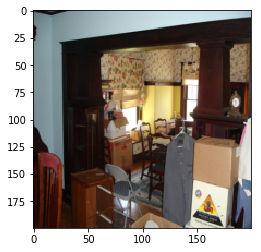

In [105]:
if __name__ == "__main__":
    main()

In [106]:
path = '/Users/shivamchandhok/Desktop/locate_it/'
data_file = 'dataa.pkl'
box_file = 'label.pkl'
class_file = 'name.pkl'
params = {}
params['LEARNING_RATE'] = 1e-3
params['N_EPOCHS'] = 10
params['BATCH_SIZE'] = 128
params['NUM_CLASSES'] = 20
params['NUM_COORDINATES'] = 4


with open(os.path.join(path, data_file), 'rb') as fp:
    data = pkl.load(fp)
    data = np.asarray(data, dtype=np.float32)
    print (data.shape)
    x_train=data[:10]
    x_test=data[4000:]
    print (x_train.shape)
    print (x_test.shape)
    
with open(os.path.join(path, box_file), 'rb') as fp:
        label = pkl.load(fp)
        label = np.asarray(label,dtype=np.float32)
        print (label.shape)
        y_train=label[:10]
        y_test=label[4000:]
        print (y_train.shape)
        print (y_test.shape)

(5011, 200, 200, 3)
(10, 200, 200, 3)
(1011, 200, 200, 3)
(5011, 4)
(10, 4)
(1011, 4)


In [114]:
y_train

array([[ 105.19999695,  112.53333282,  129.6000061 ,  180.80000305],
       [  56.40000153,   30.0300293 ,  200.        ,  198.19819641],
       [  27.60000038,   91.73332977,  108.        ,  176.        ],
       [  62.40000153,   58.25825882,  140.3999939 ,  162.16215515],
       [  55.08982086,   28.79999924,  182.63473511,  189.19999695],
       [  77.08333588,   34.06593323,  116.25      ,  109.3406601 ],
       [  92.40000153,   46.93333435,  193.19999695,  136.53334045],
       [  17.60000038,   59.20000076,  197.8666687 ,  166.3999939 ],
       [   0.59523809,   94.        ,  108.33333588,  155.19999695],
       [   5.38922167,   92.        ,  146.70658875,  200.        ]], dtype=float32)

In [107]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten, Reshape
from keras.models import Sequential
from keras.utils import np_utils



In [109]:
model = Sequential()

model.add(Convolution2D(64, 3, 3, input_shape=(200, 200, 3)))
    
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
   
    
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
    
model.add(MaxPooling2D(pool_size=(2, 2)))
    

model.add(Convolution2D(128,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
    
    

model.add(Dense(4))
    
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
hist = model.fit(x_train, y_train,
                nb_epoch=50,
                shuffle=True,
                batch_size=100)
               # validation_data=(x_test,)



/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(200, 200,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  if __name__ == '__main__':
/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  from ipykernel import kernelapp as app
/Users/shivamchandhok/anaconda3/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
activation_16 (Activation)   (None, 198, 198, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 128)       73856     
_________________________________________________________________
activation_17 (Activation)   (None, 97, 97, 128)       0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 128)       147584    
__________

In [110]:
y=model.predict(x_train)

In [111]:
y[0]

array([  98.78141785,  110.75907898,  126.67288208,  181.4683075 ], dtype=float32)

In [112]:
x_train.shape

(10, 200, 200, 3)

0
(200, 200, 3)
1
(200, 200, 3)
2
(200, 200, 3)
3
(200, 200, 3)
4
(200, 200, 3)
5
(200, 200, 3)
6
(200, 200, 3)
7
(200, 200, 3)
8
(200, 200, 3)
9
(200, 200, 3)


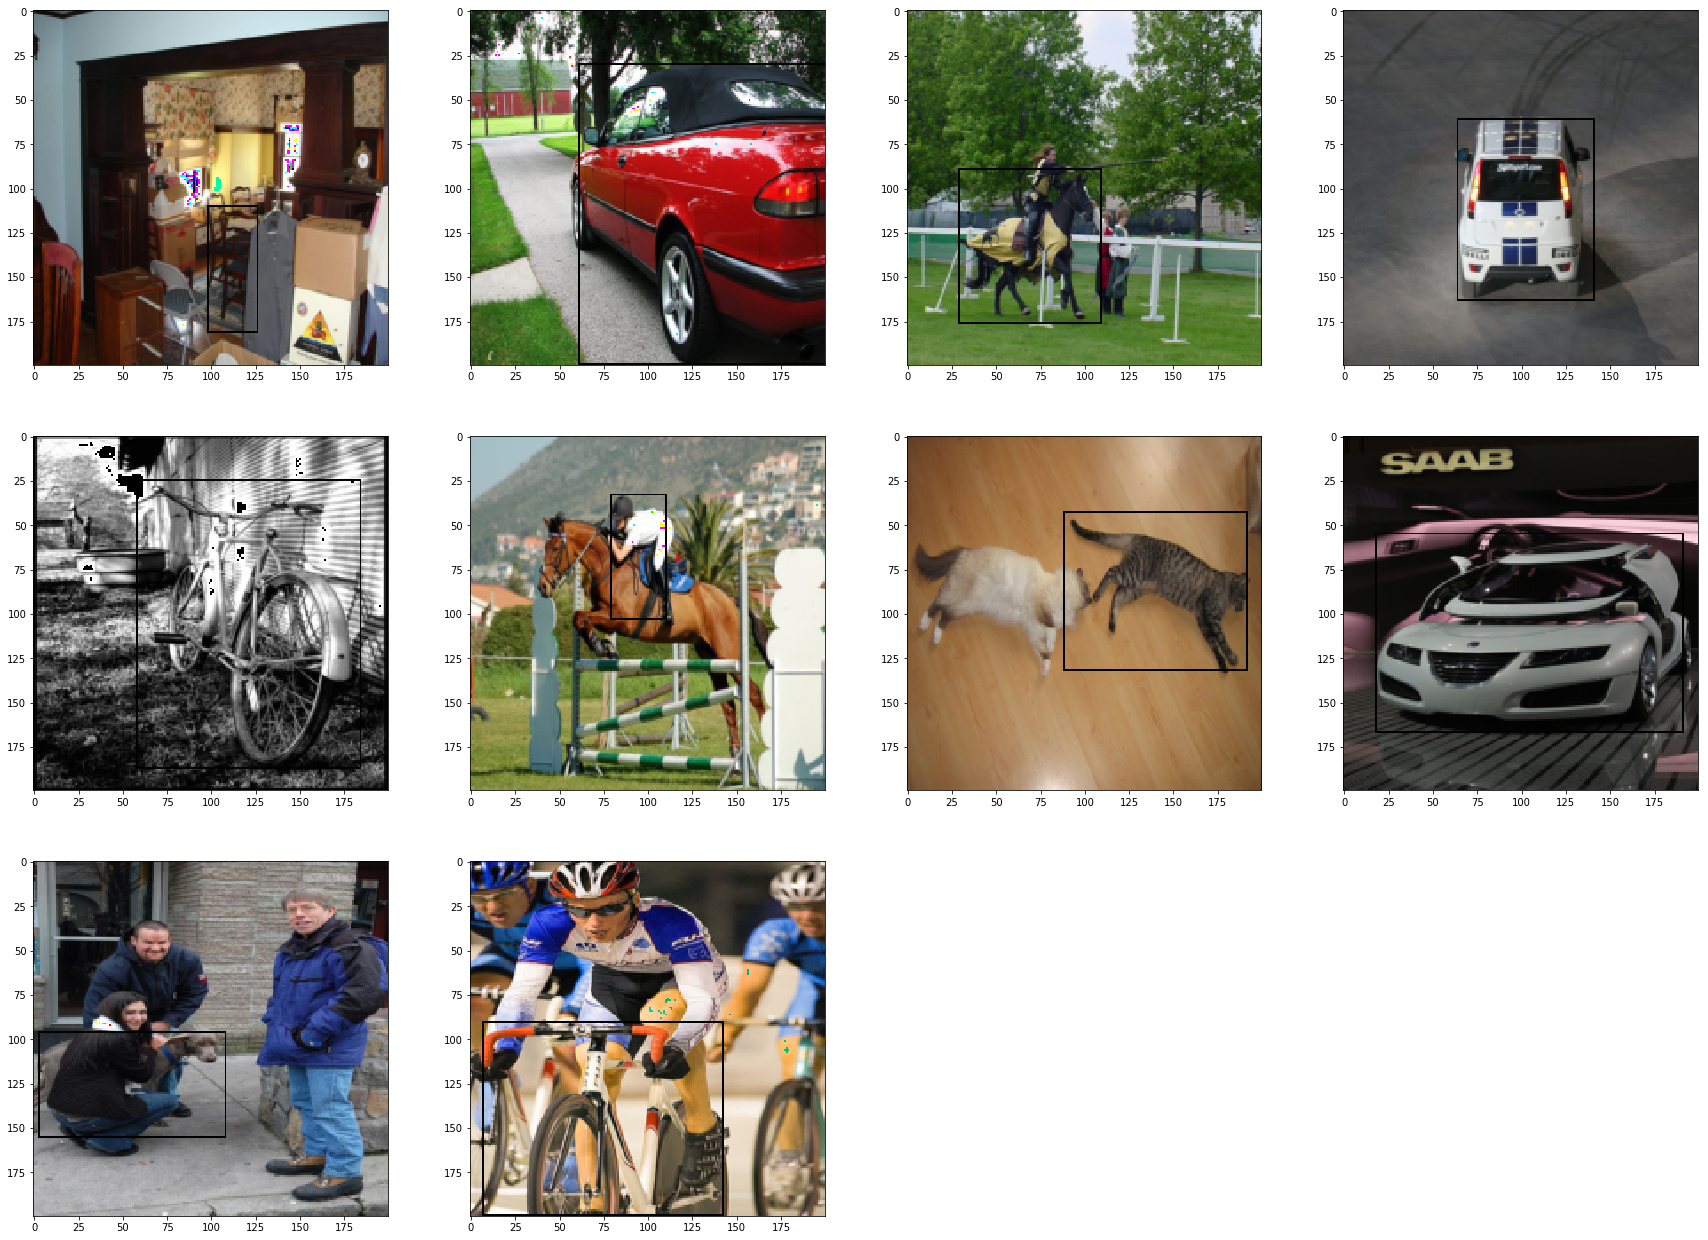

In [113]:
fig=plt.figure(figsize=(30,30))
for i,img in enumerate(x_train):
    img=255-img
    print(i)
    print(img.shape)
    img=cv2.rectangle(img,(y[i][0],y[i][1]),(y[i][2],y[i][3]),(255,255,0))
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(img)
    